In [3]:
import nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
nltk.download("stopwords")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

In [7]:

df = pd.read_csv('Ansible_Puppet_LDATask.csv')

questions = df['Questions']

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
questions.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Questions
I am new to puppet I got this error on the puppet slave. After a bit of research on the internet, I found a solution that works, unfortunately, there was not a precise explanation as to the cause of the error or what the code was doing that fixed the issue. I really do not appreciate copy and pasting codes without understanding what the code is doing and how it was fixed/ I would really appreciate it if I can get an explanation of why the error occurred and what the code is doing to fix this issue thanks.Warning: SSL_connect SYSCALL returned=5 errno=0 state=unknown stateInfo: Retrieving pluginfactsError: /File[/opt/puppetlabs/puppet/cache/facts.d]: Failed to generate additional resources using 'eval_generate': SSL_connect SYSCALL returned=5 errno=0 state=unknown stateError: /File[/opt/puppetlabs/puppet/cache/facts.d]: Could not evaluate: Could not retrieve file metadata for puppet:///pluginfacts: SSL_connect SYSCALL returned=5 errno=0 state=unknown stateInfo: Retrieving plugi

In [9]:

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
questions=questions.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
questions_clean=[]
for question in questions:
  print(question)
  questions_clean.append(clean(question).split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


I am fairly new with puppet but not new to the server administration world.

I've managed to get a puppet master up and running as well as a puppet node on a different machine. I've been working on configuring the node as a web server. I've configured my first non SSL vhost and all seems well.

I've went to setup a SSL Vhost but this is where I am running in to what I suspect is a trivial problem. I have the SSL Key/Cert/CSR/Intermediate Chain file. However, after googling I cannot seem to be able to get these files copied over to the node, automatically, through puppet.
puppet version 2.6.6
I intermittently see SSL connection errors similar to the following on puppet agents:

Could not evaluate: SSL_connect SYSCALL returned=5 errno=0 state=SSLv2/v3 
read server hello A Could not retrieve file metadata for puppet://...: 
SSL_connect SYSCALL returned=5 errno=0 state=SSLv2/v3 read server hello A
or:

Failed to generate additional resources using 'eval_generate': SSL_connect 
SYSCALL retu

In [12]:
dictionary = corpora.Dictionary(questions_clean)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:

doc_term_matrix = [dictionary.doc2bow(doc) for doc in questions_clean]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
LDA = gensim.models.ldamodel.LdaModel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
from gensim.models.coherencemodel import CoherenceModel

num_topics_values = [5]
alpha_values = [0.01, 0.1, 1]
beta_values = [0.01, 0.1, 1]
passes_values = [20, 50]
iterations_values = [50, 100]

max_coherence = -1
best_model = None
best_params = None

for num_topics in num_topics_values:
    for alpha in alpha_values:
        for beta in beta_values:
            for passes in passes_values:
                for iterations in iterations_values:
                    lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=0, alpha=alpha, eta=beta, passes=passes, iterations=iterations)

                    coherence_model_lda = CoherenceModel(model=lda_model, texts=questions_clean, dictionary=dictionary, coherence='c_v')
                    coherence_lda = coherence_model_lda.get_coherence()

                    print(f"\nNum Topics: {num_topics}, Alpha: {alpha}, Beta: {beta}, Passes: {passes}, Iterations: {iterations}")
                    print(f"Coherence Score: {coherence_lda}")

                    if coherence_lda > max_coherence:
                        max_coherence = coherence_lda
                        best_model = lda_model
                        best_params = (num_topics, alpha, beta, passes, iterations)

print("\nBest Model's Params:")
print(f"Num Topics: {best_params[0]}, Alpha: {best_params[1]}, Beta: {best_params[2]}, Passes: {best_params[3]}, Iterations: {best_params[4]}")
topics = best_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Num Topics: 5, Alpha: 0.01, Beta: 0.01, Passes: 20, Iterations: 50
Coherence Score: 0.4418450571025542

Num Topics: 5, Alpha: 0.01, Beta: 0.01, Passes: 20, Iterations: 100
Coherence Score: 0.4485817972552238

Num Topics: 5, Alpha: 0.01, Beta: 0.01, Passes: 50, Iterations: 50
Coherence Score: 0.4402009133563042

Num Topics: 5, Alpha: 0.01, Beta: 0.01, Passes: 50, Iterations: 100
Coherence Score: 0.4485817972552238

Num Topics: 5, Alpha: 0.01, Beta: 0.1, Passes: 20, Iterations: 50
Coherence Score: 0.427607075394506

Num Topics: 5, Alpha: 0.01, Beta: 0.1, Passes: 20, Iterations: 100
Coherence Score: 0.42997330958886115

Num Topics: 5, Alpha: 0.01, Beta: 0.1, Passes: 50, Iterations: 50
Coherence Score: 0.427607075394506

Num Topics: 5, Alpha: 0.01, Beta: 0.1, Passes: 50, Iterations: 100
Coherence Score: 0.42997330958886115

Num Topics: 5, Alpha: 0.01, Beta: 1, Passes: 20, Iterations: 50
Coherence Score: 0.36098430244530794

Num Topics: 5, Alpha: 0.01, Beta: 1, Passes: 20, Iterations: 100


In [32]:
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=0, alpha=1, eta=1, passes=50, iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.005*"installation" + 0.003*"puppetserver" + 0.003*"key" + 0.003*"old" + 0.002*"o"')
(1, '0.005*"ssl" + 0.005*"want" + 0.005*"file" + 0.004*"certificate" + 0.004*"using"')
(2, '0.038*"puppet" + 0.022*"master" + 0.019*"agent" + 0.012*"certificate" + 0.011*"ssl"')
(3, '0.021*"puppet" + 0.016*"im" + 0.009*"ssl" + 0.009*"certificate" + 0.007*"server"')
(4, '0.010*"could" + 0.010*"puppet" + 0.010*"errno0" + 0.009*"sslconnect" + 0.008*"certificate"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
doc_topic_dist = [lda_model.get_document_topics(doc) for doc in doc_term_matrix]

# Assign each document to the topic with the highest proportion
doc_topic = [max(doc, key=lambda x: x[1])[0] for doc in doc_topic_dist]

# Count the number of documents per topic
doc_per_topic_counts = np.bincount(doc_topic)
for i, count in enumerate(doc_per_topic_counts):
    print(f"Topic {i}: {count} documents")

Topic 0: 5 documents
Topic 1: 10 documents
Topic 2: 48 documents
Topic 3: 25 documents
Topic 4: 12 documents


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


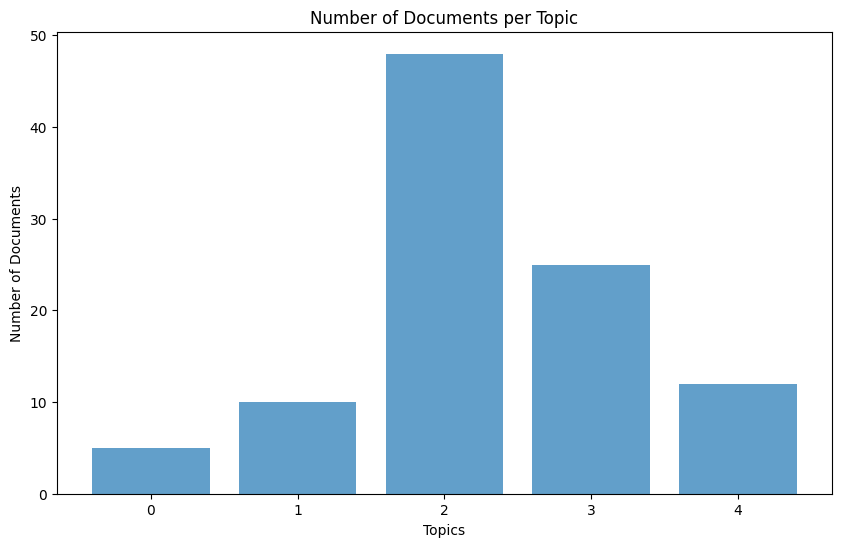

In [20]:
import matplotlib.pyplot as plt

topics, counts = np.unique(doc_topic, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(topics, counts, align='center', alpha=0.7)

plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Number of Documents per Topic')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


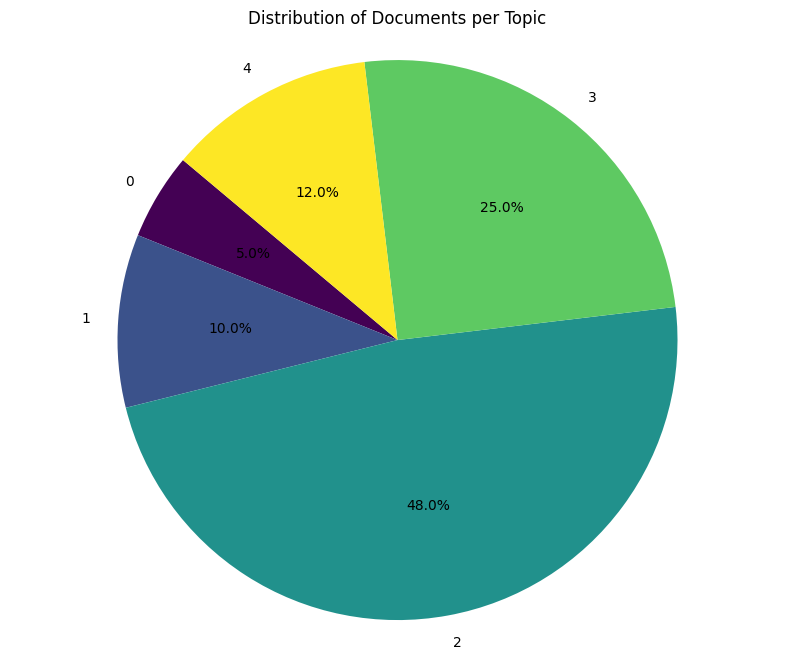

In [21]:
import matplotlib.pyplot as plt

topics, counts = np.unique(doc_topic, return_counts=True)


colors = plt.cm.viridis(np.linspace(0, 1, len(topics)))

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=topics, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Distribution of Documents per Topic')

plt.show()


In [22]:
!pip install pyLDAvis wordcloud matplotlib


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
import pyLDAvis.gensim_models

num_topics = 5

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.093394 -0.009431       1        1  43.527044
3     -0.026906  0.023534       2        1  17.760798
4      0.015887 -0.047957       3        1  14.161398
6      0.014412  0.008425       4        1   5.764135
7      0.015904  0.005625       5        1   4.251784
9      0.016981  0.006611       6        1   3.765394
5      0.015318  0.004662       7        1   3.695440
8      0.014756  0.003560       8        1   2.586690
1      0.013520  0.002486       9        1   2.243664
0      0.013521  0.002486      10        1   2.243652, topic_info=       Term       Freq      Total Category  logprob  loglift
19   master  46.000000  46.000000  Default  30.0000  30.0000
101      im  22.000000  22.000000  Default  29.0000  29.0000
41    agent  40.000000  40.000000  Default  28.0000  28.0000
45    could  11.000000  11.000000  Default  27.0000  27.0000
48   errno0   8.000000   8.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
195  trying   0.079705  16.778302  Topic10  -7.1845  -1.5524
101      im   0.079518  22.918009  Topic10  -7.1868  -1.8666
405  create   0.079415   6.519456  Topic10  -7.1881  -0.6108
49    error   0.079387  31.653630  Topic10  -7.1885  -2.1912
12      get   0.079325  19.395036  Topic10  -7.1893  -1.7022

[592 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
582       1  0.471699              0
492       1  0.475107  000defaultssl
583       1  0.471699        1002101
359       1  0.398658         127001
391       1  0.465186   1a3e942655e0
...     ...       ...            ...
246       2  0.263557          would
246       3  0.131779          would
246       4  0.131779          would
390       1  0.421917              x
1007      1  0.469064           x509

[596 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 7, 8, 10, 6, 9, 2, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


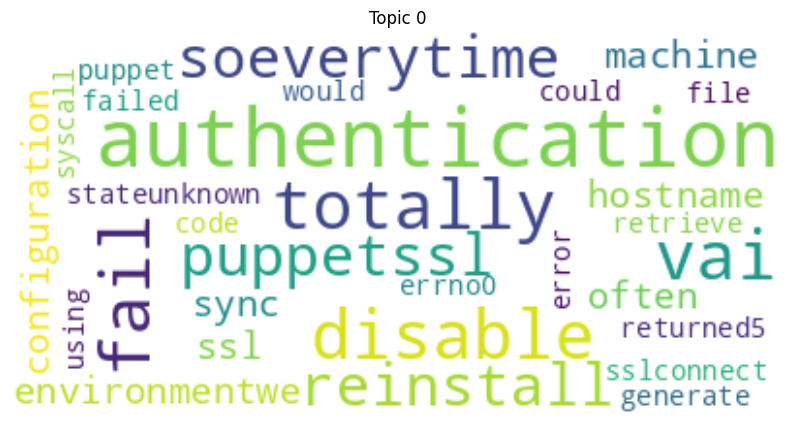

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


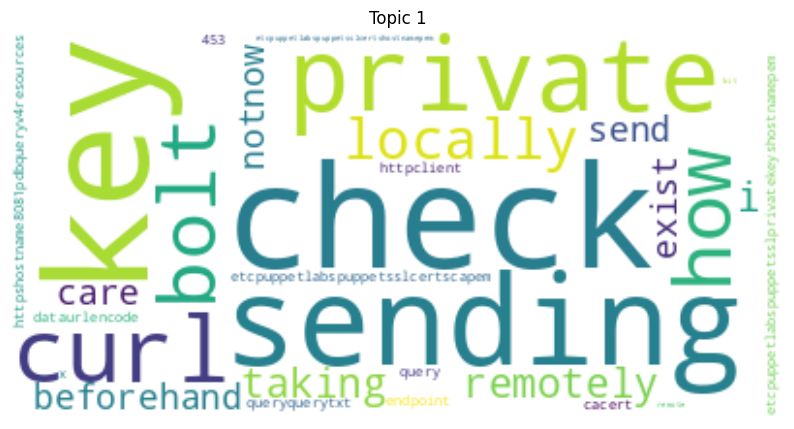

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


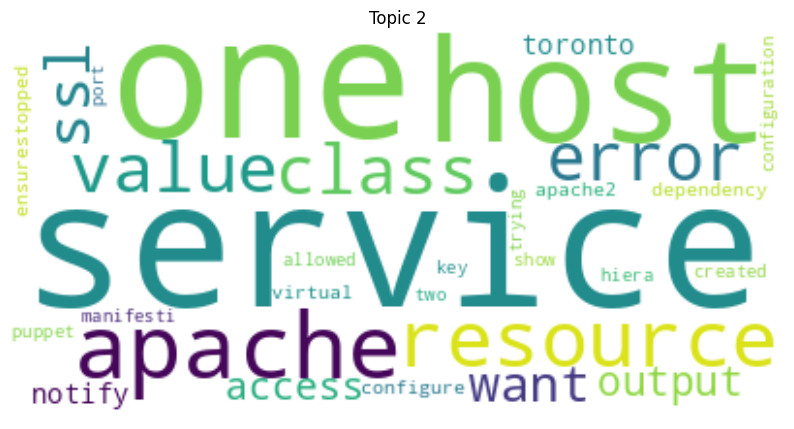

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


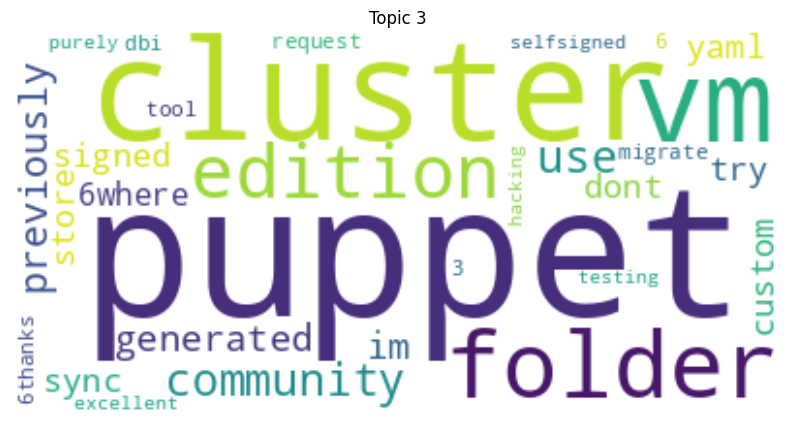

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


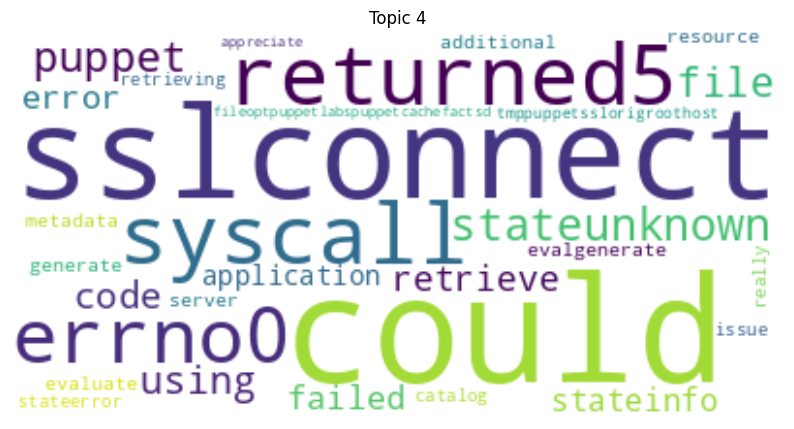

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


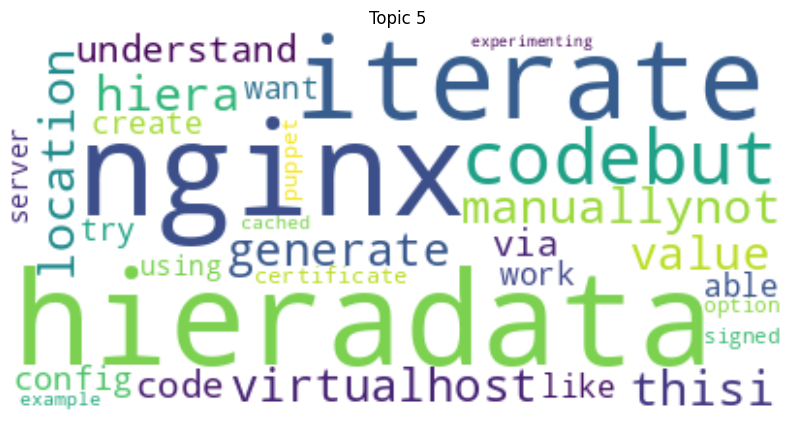

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


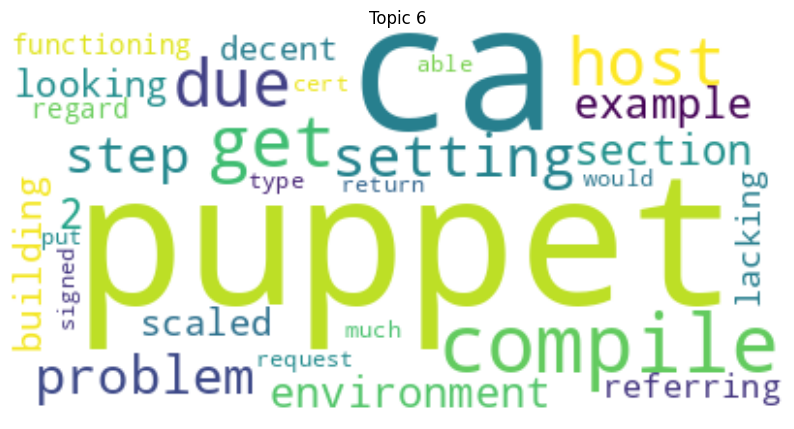

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


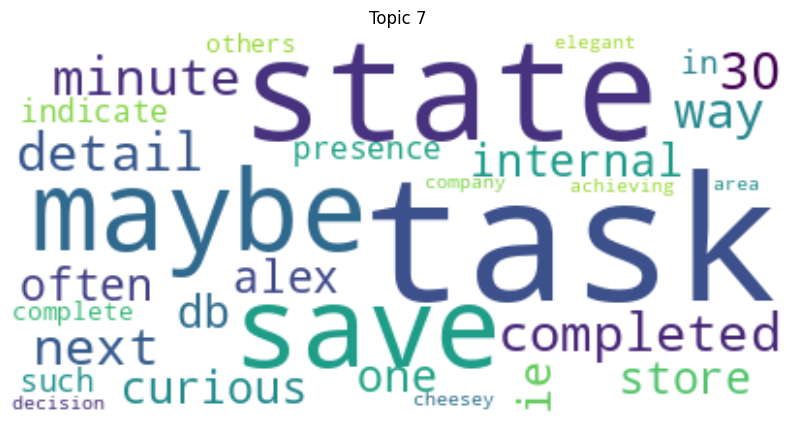

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


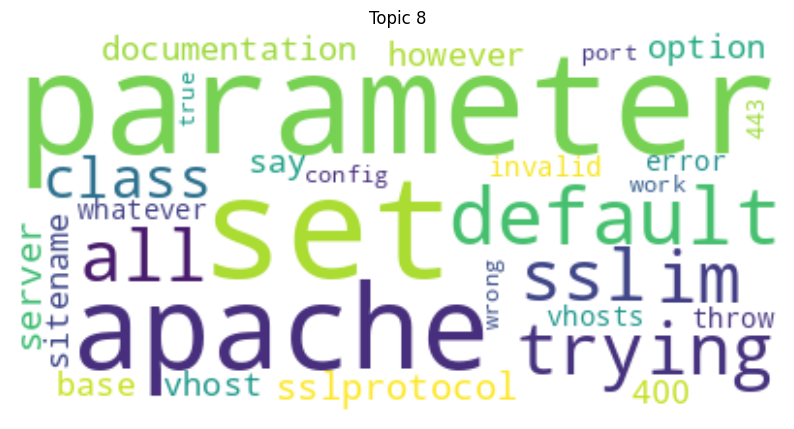

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


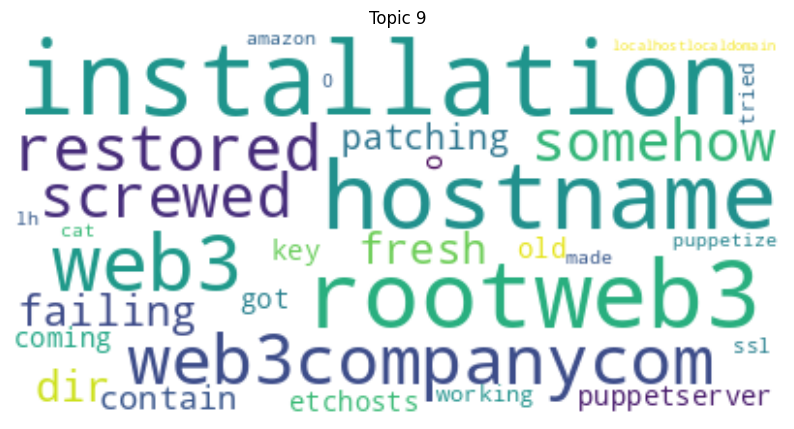

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


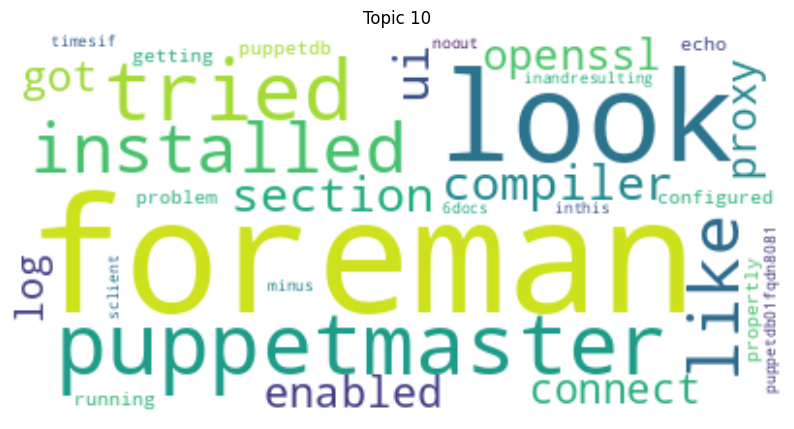

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


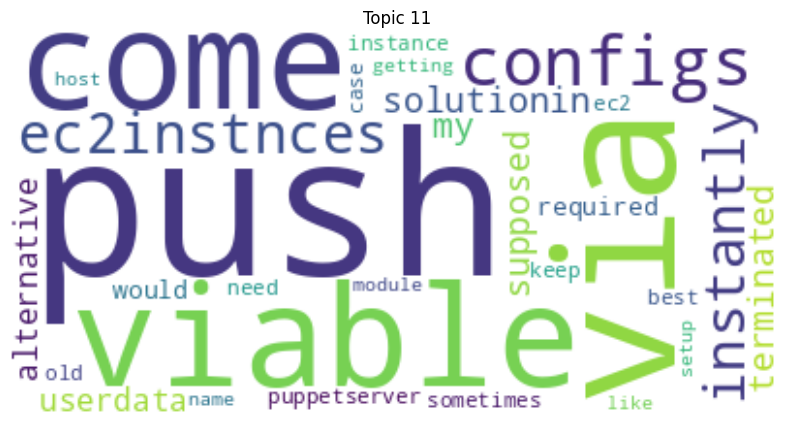

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


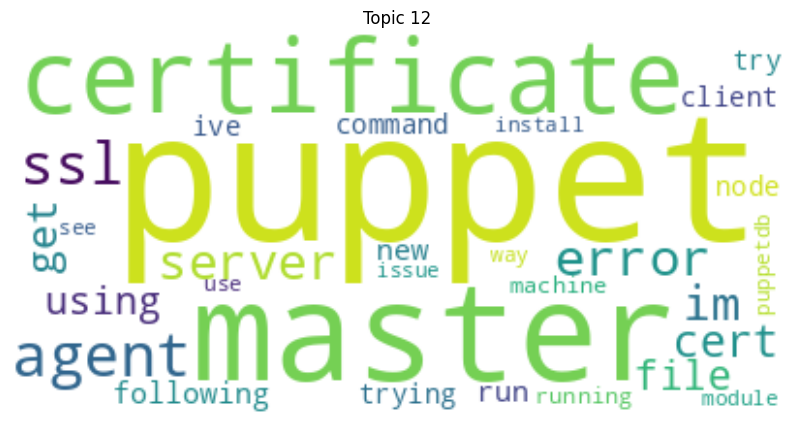

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


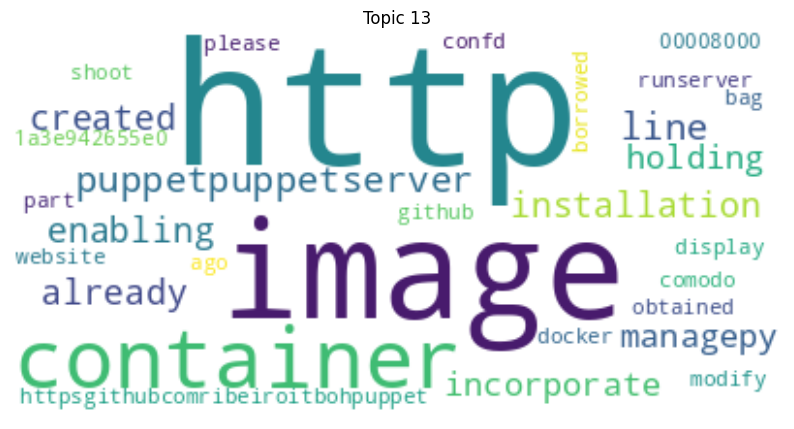

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


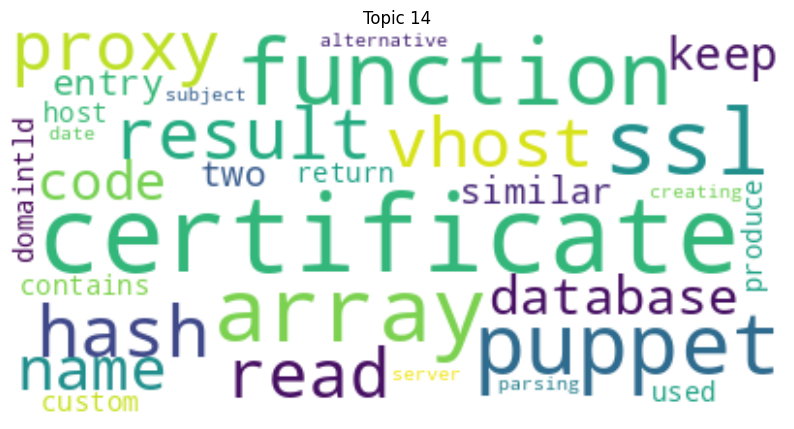

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud given a topic
def draw_wordcloud(lda_model, topic_id, word_count=30):
    terms = lda_model.show_topic(topic_id, topn=word_count)

    word_freqs = {term: freq for term, freq in terms}
    wc = WordCloud(width=400, height=200, max_words=100, background_color='white')
    wc.generate_from_frequencies(word_freqs)

    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic {topic_id}')
    plt.show()

# Draw a wordcloud for each topic
for i in range(best_model.num_topics):
    draw_wordcloud(best_model, i)


In [25]:
doc_topic_2 = np.zeros(lda_model.num_topics)
for doc in doc_topic_dist:
    for topic, prob in doc:
        doc_topic_2[topic] += prob

# Print the number of documents per topic for approach 2
for i, count in enumerate(doc_topic_2):
    print(f"Approach 2 - Topic {i}: {count} documents")

Approach 2 - Topic 0: 6.263549575582147 documents
Approach 2 - Topic 1: 11.037881868891418 documents
Approach 2 - Topic 2: 46.43033595383167 documents
Approach 2 - Topic 3: 23.41968987416476 documents
Approach 2 - Topic 4: 12.700211500748992 documents


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


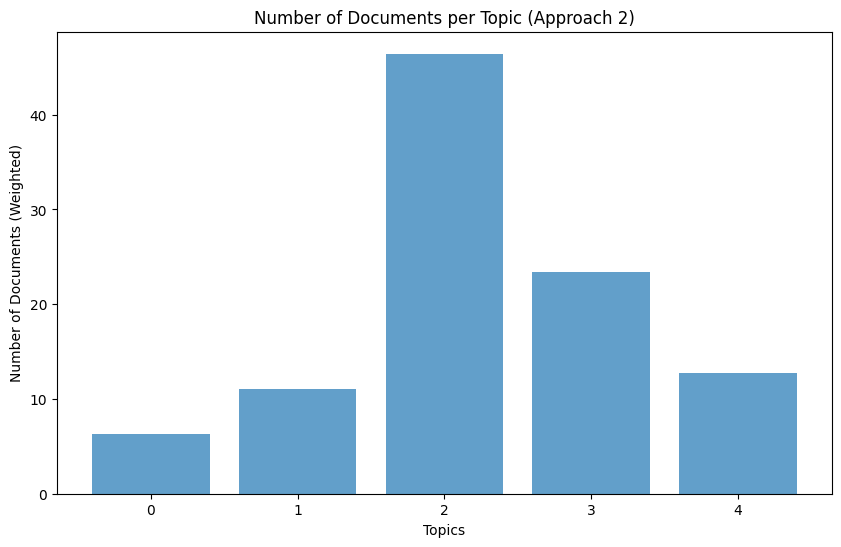

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(doc_topic_2)), doc_topic_2, align='center', alpha=0.7)

plt.xlabel('Topics')
plt.ylabel('Number of Documents (Weighted)')
plt.title('Number of Documents per Topic (Approach 2)')

plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


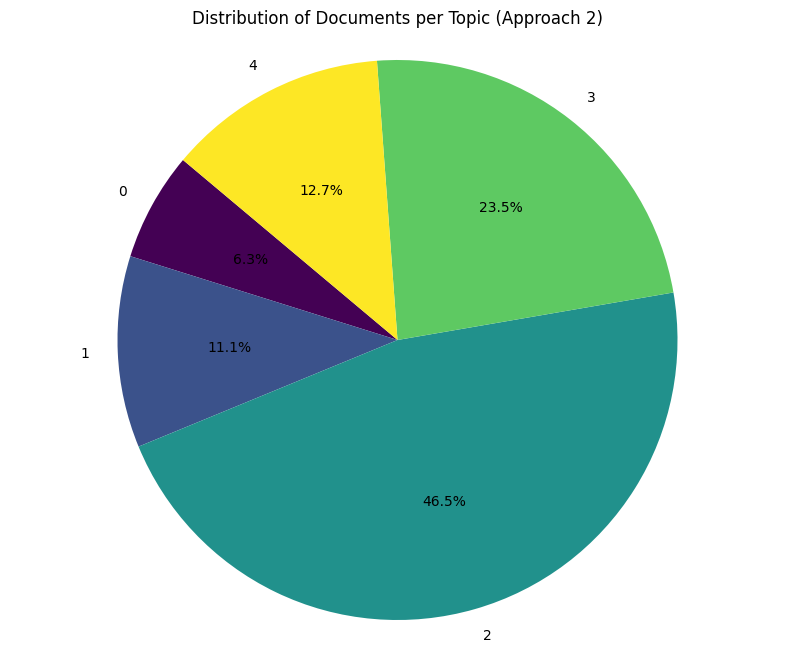

In [27]:

colors = plt.cm.viridis(np.linspace(0, 1, len(doc_topic_2)))

plt.figure(figsize=(10, 8))
plt.pie(doc_topic_2, labels=range(len(doc_topic_2)), colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Distribution of Documents per Topic (Approach 2)')

plt.show()
